<a href="https://colab.research.google.com/github/he-yilan/COVID19_HousholdSizeModeling/blob/master/ABM_RMSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RMSE of Agent-Based Simulation of COVID-19
Source for the agent-based model (ABM): <br>
Prof. Dr. Petrônio Cândido de Lima e Silva (petronio.candido@ifnmg.edu.br)
Experiments for the post published on Towards Data Science, available at https://towardsdatascience.com/agent-based-simulation-of-covid-19-health-and-economical-effects-6aa4ae0ff397

In [30]:
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##NYT


In [32]:
IRLinfected = [] #COVID-19 cases according to The NYT
IRLdeaths = [] #COVID-19 deaths according to The NYT
infected = [] #COVID-19 cases according to the ABM
deaths = [] #COVID-19 deaths according to the ABM

In [33]:
data = pd.read_csv('/content/drive/My Drive/Data/us 21.csv')

for i in range(len(data.cases)):
  IRLinfected.insert(i, data.cases[i])

for i in range(len(data.deaths)):
  IRLdeaths.insert(i, data.deaths[i])

data

,date,cases,deaths
0,2020/7/1,2703296,128104
1,2020/7/2,2758851,128827
2,2020/7/3,2815374,129417
3,2020/7/4,2866014,129679
4,2020/7/5,2910780,129941
5,2020/7/6,2958095,130332
6,2020/7/7,3012252,131290
7,2020/7/8,3071711,132238
8,2020/7/9,3131610,133079
9,2020/7/10,3199837,133907


In [34]:
predictions = pd.read_csv("/content/drive/My Drive/Data/scenario1.csv")
caseCount = 0
deathCount = 0

for i in range(len(predictions.Avg)):
  if predictions.Metric[i] == "Infected":
    numCases = predictions.Avg[i]*328239523
    infected.insert(caseCount, numCases)
    caseCount += 1
  elif predictions.Metric[i] == "Death":
    numDeaths = predictions.Avg[i]*328239523
    deaths.insert(deathCount, numDeaths)
    deathCount += 1

predictions

,Iteration,Metric,Min,Avg,Std,Max
0,0,Susceptible,0.985168,0.985168,0.0,0.985168
1,0,Infected,0.005134,0.005134,0.0,0.005134
2,0,Recovered_Immune,0.009698,0.009698,0.0,0.009698
3,0,Death,0.000000,0.000000,0.0,0.000000
4,0,Asymptomatic,1.000000,1.000000,0.0,1.000000
...,...,...,...,...,...,...
247,20,Q1,8728.201578,8728.201578,0.0,8728.201578
248,20,Q2,19549.095592,19549.095592,0.0,19549.095592
249,20,Q3,31148.122030,31148.122030,0.0,31148.122030
250,20,Q4,50572.094620,50572.094620,0.0,50572.094620


###RMSE for number of cases

In [35]:
rmse = sqrt(mean_squared_error(IRLinfected, infected)) #calculating root-mean-square error (RMSE)
print(rmse)

635048.6452500125


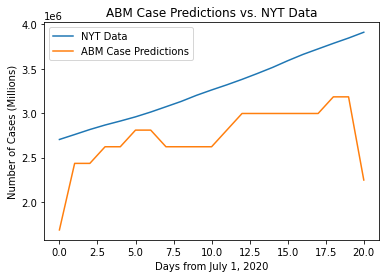

In [36]:
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

y1 = IRLinfected
y2 = infected

plt.plot(x, y1, label="NYT Data")
plt.plot(x, y2, label="ABM Case Predictions")

plt.xlabel("Days from July 1, 2020")
plt.ylabel("Number of Cases (Millions)")
plt.title("ABM Case Predictions vs. NYT Data")

plt.legend()
plt.savefig('NYTcases.png', dpi = 300)
plt.show()

###RMSE for number of deaths

In [37]:
rmse = sqrt(mean_squared_error(IRLdeaths, deaths)) #calculating RMSE
print(rmse)

85381.58640507549


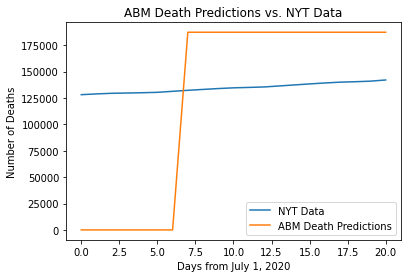

In [38]:
x = x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

y1 = IRLdeaths
y2 = deaths

plt.plot(x, y1, label="NYT Data")
plt.plot(x, y2, label="ABM Death Predictions")

plt.xlabel("Days from July 1, 2020")
plt.ylabel("Number of Deaths")
plt.title("ABM Death Predictions vs. NYT Data")

plt.legend()
plt.savefig('NYTdeaths.png', dpi = 300)
plt.show()

##Wikipedia


In [39]:
IRLinfected = [] #COVID-19 cases according to Wikipedia
IRLdeaths = [] #COVID-19 deaths according to Wikipedia
infected = [] #COVID-19 cases according to the ABM
deaths = [] #COVID-19 deaths according to the ABM

In [40]:
data = pd.read_csv('/content/drive/My Drive/Data/wikipedia21 - Sheet1.csv')

for i in range(len(data.cases)):
  IRLinfected.insert(i, data.cases[i])

for i in range(len(data.deaths)):
  IRLdeaths.insert(i, data.deaths[i])

data

,Date,cases,deaths
0,7/1/2020,2640626,117698
1,7/2/2020,2695495,118369
2,7/3/2020,2752704,118979
3,7/4/2020,2803397,119252
4,7/5/2020,2846350,119464
5,7/6/2020,2893083,119698
6,7/7/2020,2944191,120615
7,7/8/2020,3006650,121428
8,7/9/2020,3064093,122296
9,7/10/2020,3131114,123151


In [41]:
predictions = pd.read_csv("/content/drive/My Drive/Data/scenario1.csv")
caseCount = 0
deathCount = 0

for i in range(len(predictions.Avg)):
  if predictions.Metric[i] == "Infected":
    numCases = predictions.Avg[i]*328239523
    infected.insert(caseCount, numCases)
    caseCount += 1
  elif predictions.Metric[i] == "Death":
    numDeaths = predictions.Avg[i]*328239523
    deaths.insert(deathCount, numDeaths)
    deathCount += 1

predictions

,Iteration,Metric,Min,Avg,Std,Max
0,0,Susceptible,0.985168,0.985168,0.0,0.985168
1,0,Infected,0.005134,0.005134,0.0,0.005134
2,0,Recovered_Immune,0.009698,0.009698,0.0,0.009698
3,0,Death,0.000000,0.000000,0.0,0.000000
4,0,Asymptomatic,1.000000,1.000000,0.0,1.000000
...,...,...,...,...,...,...
247,20,Q1,8728.201578,8728.201578,0.0,8728.201578
248,20,Q2,19549.095592,19549.095592,0.0,19549.095592
249,20,Q3,31148.122030,31148.122030,0.0,31148.122030
250,20,Q4,50572.094620,50572.094620,0.0,50572.094620


###RMSE for number of cases

In [42]:
rmse = sqrt(mean_squared_error(IRLinfected, infected)) #calculating RMSE
print(rmse)

575275.501112363


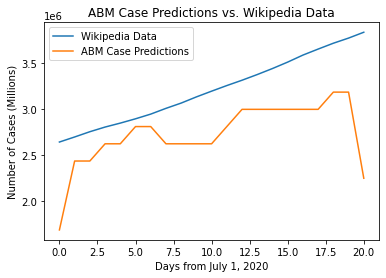

In [43]:
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

y1 = IRLinfected
y2 = infected

plt.plot(x, y1, label="Wikipedia Data")
plt.plot(x, y2, label="ABM Case Predictions")

plt.xlabel("Days from July 1, 2020")
plt.ylabel("Number of Cases (Millions)")
plt.title("ABM Case Predictions vs. Wikipedia Data")

plt.legend()
plt.savefig('Wikicases.png', dpi = 300)
plt.show()

###RMSE for number of deaths

In [44]:
rmse = sqrt(mean_squared_error(IRLdeaths, deaths)) #calculating RMSE
print(rmse)

85006.41717142622


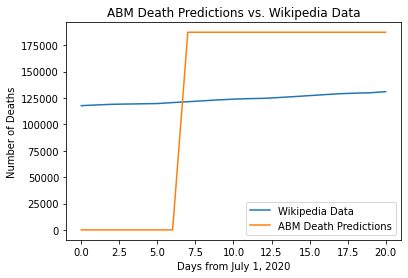

In [45]:
x = x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

y1 = IRLdeaths
y2 = deaths

plt.plot(x, y1, label="Wikipedia Data")
plt.plot(x, y2, label="ABM Death Predictions")

plt.xlabel("Days from July 1, 2020")
plt.ylabel("Number of Deaths")
plt.title("ABM Death Predictions vs. Wikipedia Data")

plt.legend()
plt.savefig('Wikideaths.png', dpi = 300)
plt.show()